In [2]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [17]:
from sklearn.datasets import load_iris

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
eye = np.eye(4)
identity = np.identity(4)
eye == identity
sparse_matrix = sparse.csr_matrix(eye)
sparse_matrix.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [12]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
# (0, 0), (1, 1)의 개념인듯
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
eye_coo

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in COOrdinate format>

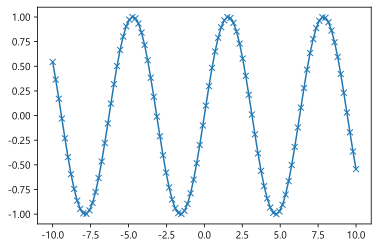

In [16]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='x')

In [19]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
iris_df = pd.concat([pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names']),
pd.DataFrame(iris_dataset['target'], columns=['target'])], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
iris_dataset = load_iris(as_frame=True)
iris_df = (iris_dataset['data']
.assign(target=iris_dataset['target'])
)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
iris_dataset['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


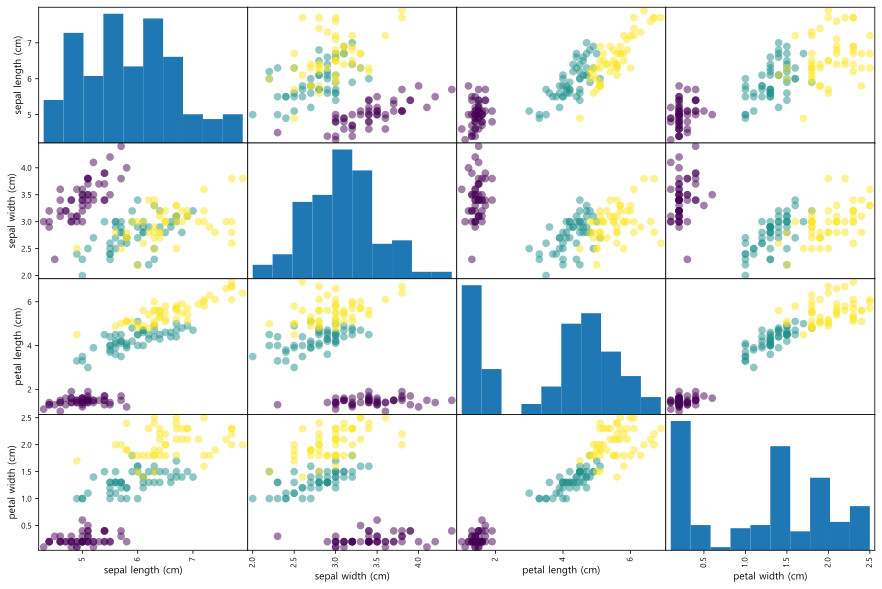

In [49]:
scatter_matrix(iris_dataset['data'], c=iris_dataset['target'], marker='o', s=60, figsize=(15, 10))
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
y_pred, accuracy

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2]),
 0.9736842105263158)